In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

In [2]:
# exact function definitions and derivatives

pi = np.pi                                  # 3.14..
nx = 200                                    # number of grid points (fine grid)
lx = pi                                     # length of the interval
dx = lx / (nx-1)                            # grid spacing - why divide by (nx-1) instead of (nx)?
                                            # if there are (nx) grid points in the grid, then there are (nx-1) grid spacing

# creating coordinates and functions at the fine grid points
x = np.linspace(0,lx,nx)                    # creating the grid with nx=200 grid points/coordinates for coarse grid points
f = np.exp(x)*np.sin(3*pi*x)                # function at the fine grid


#exact derivative of the function below
dfdx = np.exp(x)*(np.sin(3*pi*x)+3*pi*np.cos(3*pi*x))

In [3]:
# finite differences

nx = 80                                     # no. of grid points (coarse grid)
lx = pi                                     # length of the interval
dx = lx / (nx-1)                            # grid spacing, for (nx) grid points, there are (nx-1) grid spacings

#creating coordinates and functions at coarse grid points
x_c = np.linspace(0,lx,nx)                  # creating grid with nx = 80 grid points/coordinates for coarse grid points        
f_c = np.exp(x_c)*np.sin(3*pi*x_c)          # functions for coarse grid points

# creating containers for the finite differences
df_forward = np.empty(nx)
df_backward = np.empty(nx)
df_centered = np.empty(nx)

for i in range(0,nx-1):                      # last grid point omitted
    df_forward[i] = (f_c[i+1] - f_c[i])/dx

for i in range(1,nx):                        # first grid point omitted
    df_backward[i] = (f_c[i] - f_c[i-1])/dx

for i in range(1,nx-1):                      # first and last grid points omitted
    df_centered[i] = (f_c[i+1] - f_c[i-1])/(2*dx)
    

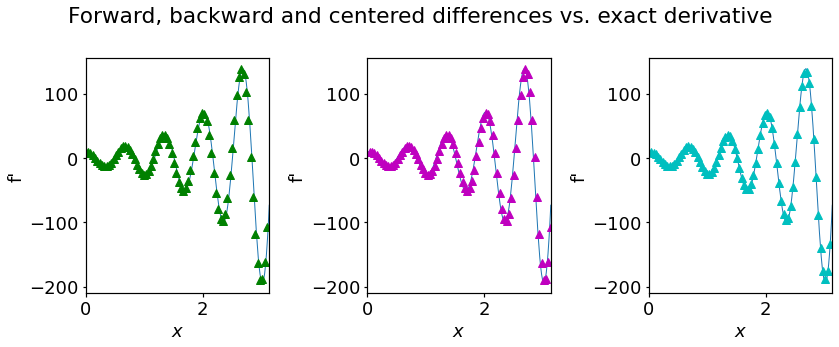

In [4]:
# plotting

fig, ax = plt.subplots(1,3,figsize=(12,5),tight_layout=True)

fig.suptitle('Forward, backward and centered differences vs. exact derivative')

for axis in ax:
    axis.set_xlim(x[0],x[-1])
    
    axis.set_xlabel('$x$')
    axis.set_ylabel("f'")
    
ax[0].plot(x,dfdx)
ax[0].plot(x_c[0:nx-1],df_forward[0:nx-1],'^g')

ax[1].plot(x,dfdx)
ax[1].plot(x_c[1:nx],df_backward[1:nx],'^m')

ax[2].plot(x,dfdx)
ax[2].plot(x_c[1:nx-1],df_centered[1:nx-1],'^c')


In [5]:
# exact derivative

nx = 200                  # no. of grid points for fine grid for exact solution
lx = np.pi                # length of the grid

x = np.linspace(0,lx,nx)  # coordinates of the grid

dfdx = np.exp(x)*((np.sin(3*np.pi*x)) + 3*np.pi*np.cos(3*np.pi*x))

In [6]:
# approximation using finite difference

nx = 80          # number of coarse grid points
lx = np.pi       # length of the grid
dx = lx/(nx-1)   # grid spacing (for nx grid points, there are (nx-1) grid spacings)

x_c = np.linspace(0,lx,nx)              # coordinates in the grid
f_c = np.exp(x_c)*np.sin(3*np.pi*x_c)   # function at the coordinates of the grid

df_2 = np.empty(nx)

df_2[0] = ((-3./2)*f_c[0] + 2*f_c[1] - (1./2)*f_c[2]) / dx
df_2[-1] = ((3./2)*f_c[-1] - 2*f_c[-2] + (1/2)*f_c[-3]) / dx
df_2[1:-1] = (f_c[2:] - f_c[:-2]) / (2*dx)  # solution using python slicing

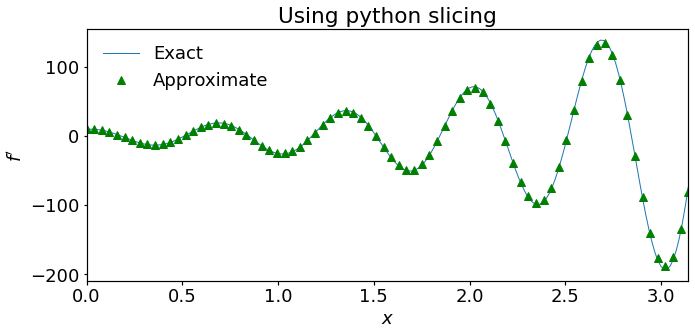

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(min(x[0],x_c[0]), max(x[-1],x_c[-1]))

ax.plot(x,dfdx, label='Exact')
ax.plot(x_c,df_2, '^g', label='Approximate')

ax.set_xlabel('$x$')
ax.set_ylabel("$f'$")
ax.set_title('Using python slicing')
ax.legend(loc='upper left')

In [8]:
# approximation using finite difference

nx = 80          # number of coarse grid points
lx = np.pi       # length of the grid
dx = lx/(nx-1)   # grid spacing (for nx grid points, there are (nx-1) grid spacings)

x_c = np.linspace(0,lx,nx)              # coordinates in the grid
f_c = np.exp(x_c)*np.sin(3*np.pi*x_c)   # function at the coordinates of the grid

df_2_new = np.empty(nx)

df_2_new[0] = ((-3./2)*f_c[0] + 2*f_c[1] - (1./2)*f_c[2]) / dx
df_2_new[-1] = ((3./2)*f_c[-1] - 2*f_c[-2] + (1/2)*f_c[-3]) / dx

for i in range(1,nx-1): # solution using for loop
    df_2_new[i] = (f_c[i+1] - f_c[i-1]) / (2*dx)

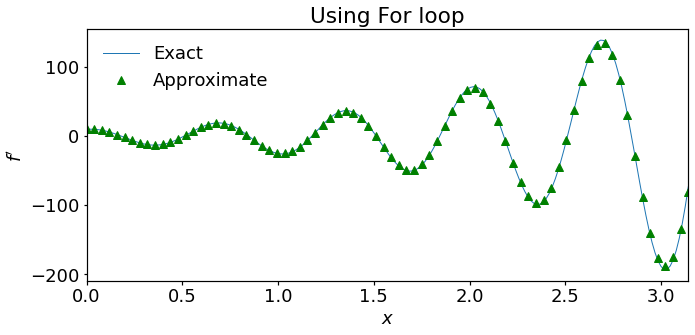

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(min(x[0],x_c[0]), max(x[-1],x_c[-1]))

ax.plot(x,dfdx, label='Exact')
ax.plot(x_c,df_2_new, '^g', label='Approximate')

ax.set_xlabel('$x$')
ax.set_ylabel("$f'$")
ax.set_title('Using For loop')
ax.legend(loc='upper left')

In [10]:
pi = np.pi                # 3.14

In [11]:
# exact solution

nx = 200              # no. of grid points
lx = pi               # length of the interval
dx = lx/(nx-1)        # grid spacing length

x = np.linspace(0,lx,nx)

f = np.empty(nx)
f = np.exp(x)*np.sin(3*pi*x)

ddf = np.exmpty(nx)
ddf = np.exp(x)*(np.sin(3*pi*x)+6*pi*np.cos(3*pi*x)-9*pi**2*np.sin(3*pi*x))

In [14]:
# numerical solution

nx = 80               # no. of grid points
lx = pi               # length of the interval
dx = lx/(nx-1)        # grid spacing length, for nx grid points - there are (nx-1) grid spacings

x_c = np.linspace(0,lx,nx)

f_c = np.empty(nx)
f_c = np.exp(x_c)*np.sin(3*pi*x_c)

ddf_c = np.empty(nx)
ddf_c[1:-1] = (f_c[:-2] - 2*f_c[1:-1] + f_c[2:])/(dx**2)

Text(0, 0.5, "$f''$")

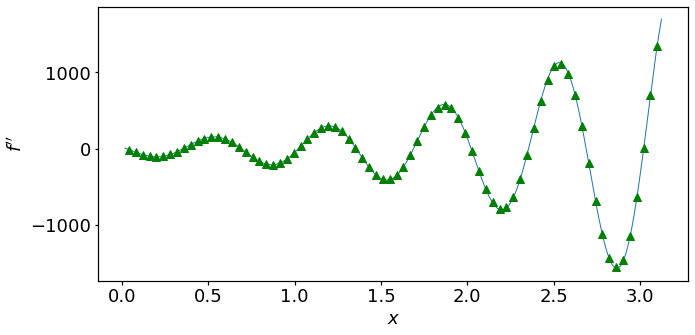

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x[1:-1],ddf[1:-1])
ax.plot(x_c[1:-1],ddf_c[1:-1],'^g')
ax.set_xlabel('$x$')
ax.set_ylabel('$f\'\'$')